In [21]:
import higra as hg
import os, glob
import rasterio
import matplotlib.pyplot as plt
from matplotlib import gridspec, cm
%matplotlib inline

In [30]:
import sys
sys.path.append('/path/to/decode')

In [ ]:
from decode.postprocessing import InstSegm

In [12]:
fn_preds = '/path/to/your/predictions.tif'

Read the output of Fractal ResUNet. It consists in three bands: the extent mask, the boundary mask and the distance mask.

In [14]:
with rasterio.open(fn_preds, 'r') as src:
    r_xtt, r_bnd, r_dst = src.read()

Visualise these three masks

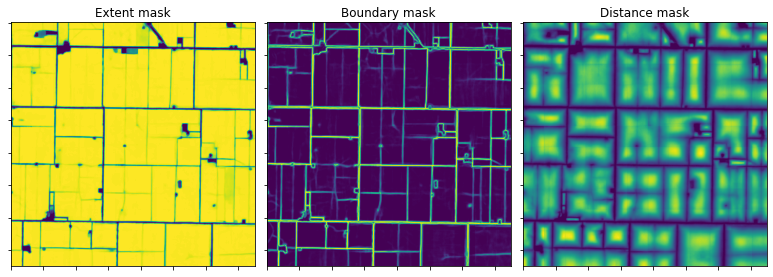

In [27]:
plot_preds(r_xtt, r_bnd, r_dst)

Use the extent mask and the boundary mask as input to the hierarchical wathershed segmentation algorithm.
Two parameters need to be defined:
- t_ext: a threshold applied on the extent mask which controls 
- t_bound: a threshold that defines the level at which the hierachl watershed segm

In [63]:
out = InstSegm(r_xtt, r_bnd, t_ext=0.5, t_bound=0.2)

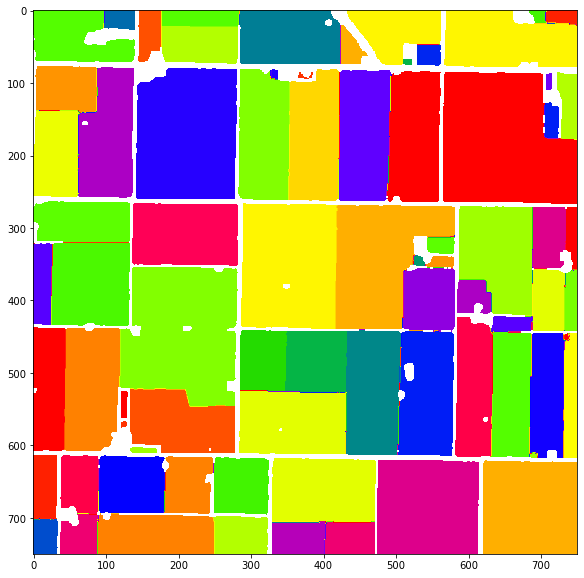

In [64]:
fig = plt.figure(figsize=(10,10))
plt.imshow(out, cmap=plt.get_cmap('prism'), interpolation=None)